['17_45_35']
time 17_45_35


<IPython.core.display.Javascript object>


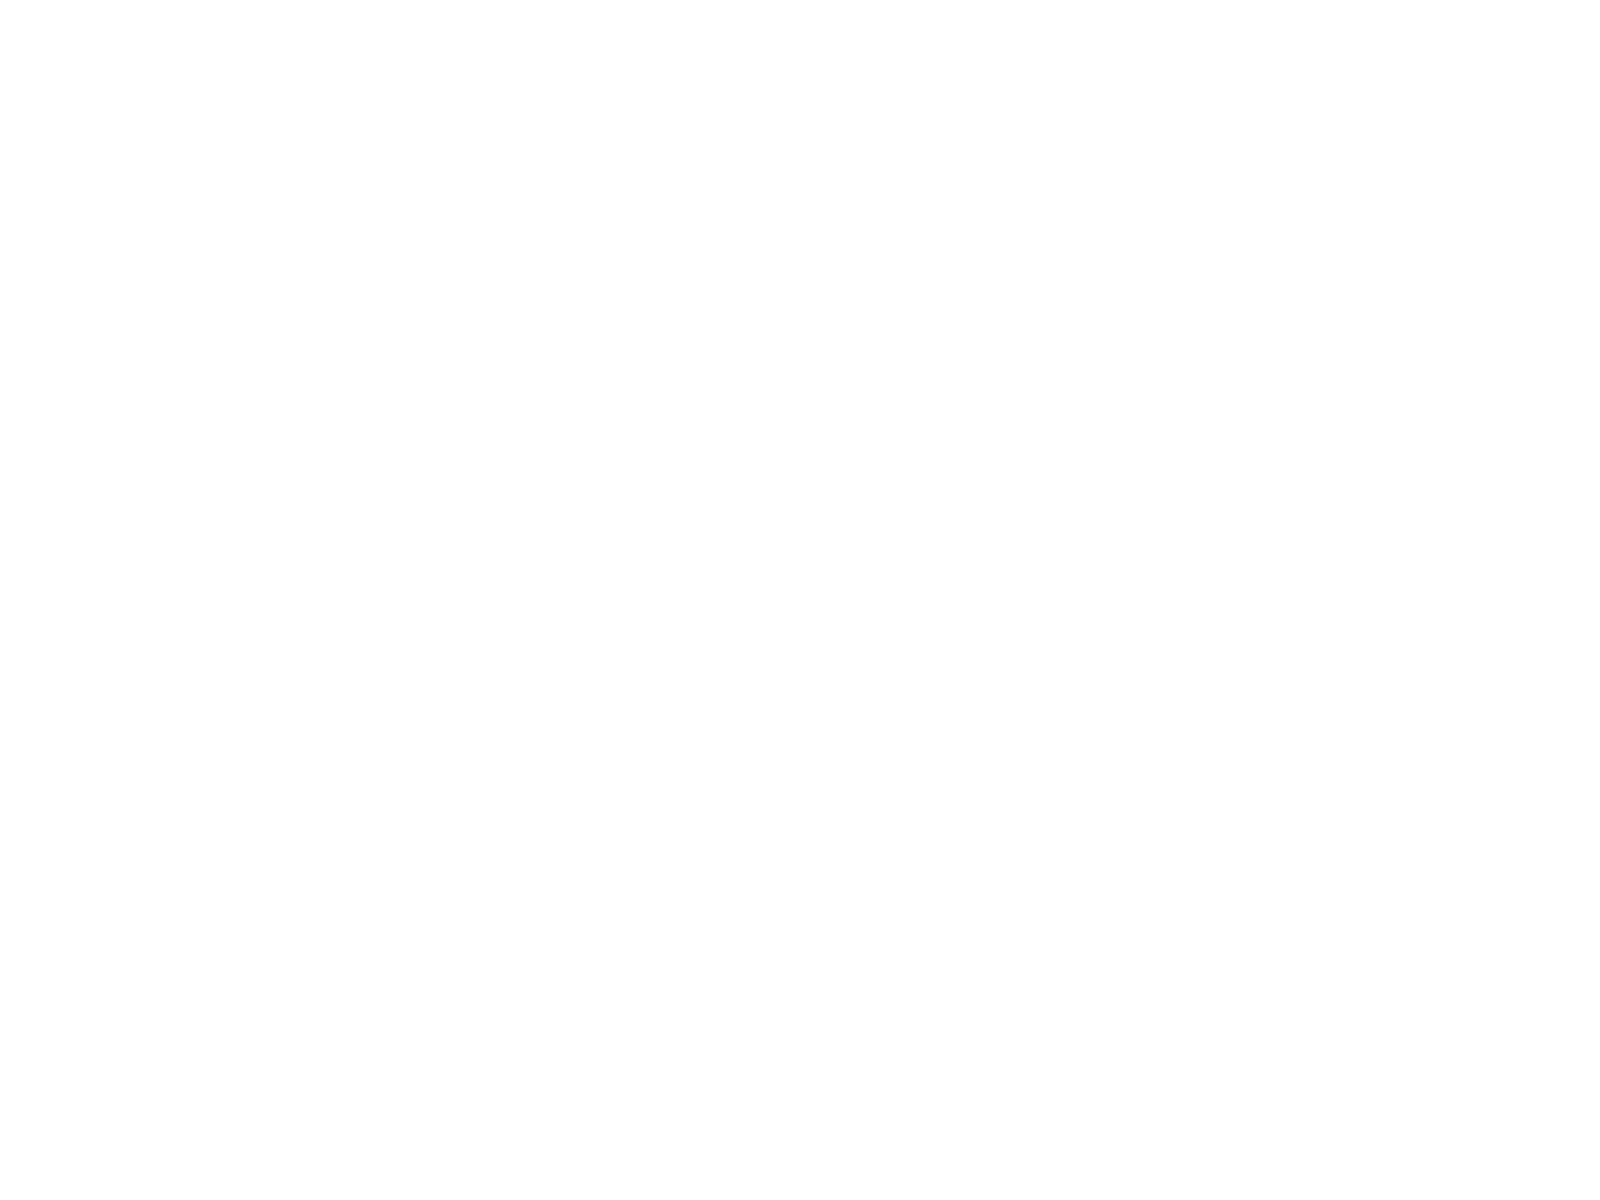

In [1]:
from utilObj0 import *
import matplotlib.pyplot as plt
import numpy as np
import os, errno
import pandas as pd
%matplotlib nbagg

## read in all the channels
# name of the folder & the file
fdname = "051419fly1cell2"
celltype = 'HS_L'

genotype = 'HSfly1cell2' # the stimulus folder
stimulus = 'Edges_light_vel_vert_grey'
#'Sq_12dir_lambda30_1Hz';#'Sine_0_lambda30_mHz'; 'Sine_0_lambda30_ACC' 
#'Sq_LR_12dir_lambda30_1Hz'; #'Sq_LR_12dir_lambda30_1Hz_bgstill_15gap'
#'flowfielddots' #'flowfielddots_dark'; 
# 'yawdots_mHz', # 'yawdots_dark_mHz'
#'Sq_LR_local_4dir'
# 'Sq_PvN_lambda30_1Hz', 'Sq_PvN_lambda30_1Hz_bgstill_15gap'
# 'flashOnOff_mHz','flashOffOn_mHz'
# 'Sine_PDND_lambda30_xHz'
# 'Sine_0_lambda30_1Hz_xC'
# 'Sine_12dir_lambda30_1Hz', 'Sine_12dir_lambda30_1Hz_0.5c'
# 'Edges_light_vel', 'Edges_dark_vel'
# 'Sine_strips_3Hz'

sNo = -1 # the 1st [0] or the 2nd [1] of the 2
recN = 15 # the number of the recording
spiking = False

year = '2019'
date = fdname[:2]+'_'+fdname[2:4]
fdname = '%s/%s' %(celltype,fdname)

csvroot = "C:/Users/Huayi/Google Drive/Desplan Lab/FuncExpt/3screens/data/%s/%s/%s/%s/" %(genotype,stimulus,year,date)

all_subdirs = [dirnames for (dirpath, dirnames, filenames) in os.walk(csvroot)]
if len(all_subdirs[0]) > 2:
    print('check dir')
print(all_subdirs[0])
time = all_subdirs[0][sNo]; print('time %s' %time)

csvpath = csvroot+ '%s/textStimData.csv' %(time)

Raw = RAW(stimulus,fdname,recN,spiking, csvroot, csvpath)
Raw.readtraces()

if spiking: 
    th1 = 0.12 #0.15
    th2 = 5 #2
    th3 = -35
    Raw.detectAP(th1,th2,th3)
else: 
    Raw.spike_idx = None

#plot all data to check on them
ta,tb = 0,len(Raw.t) # range for plotting. 0,len(t) is start to end.
Raw.plotrange(ta,tb)

<IPython.core.display.Javascript object>


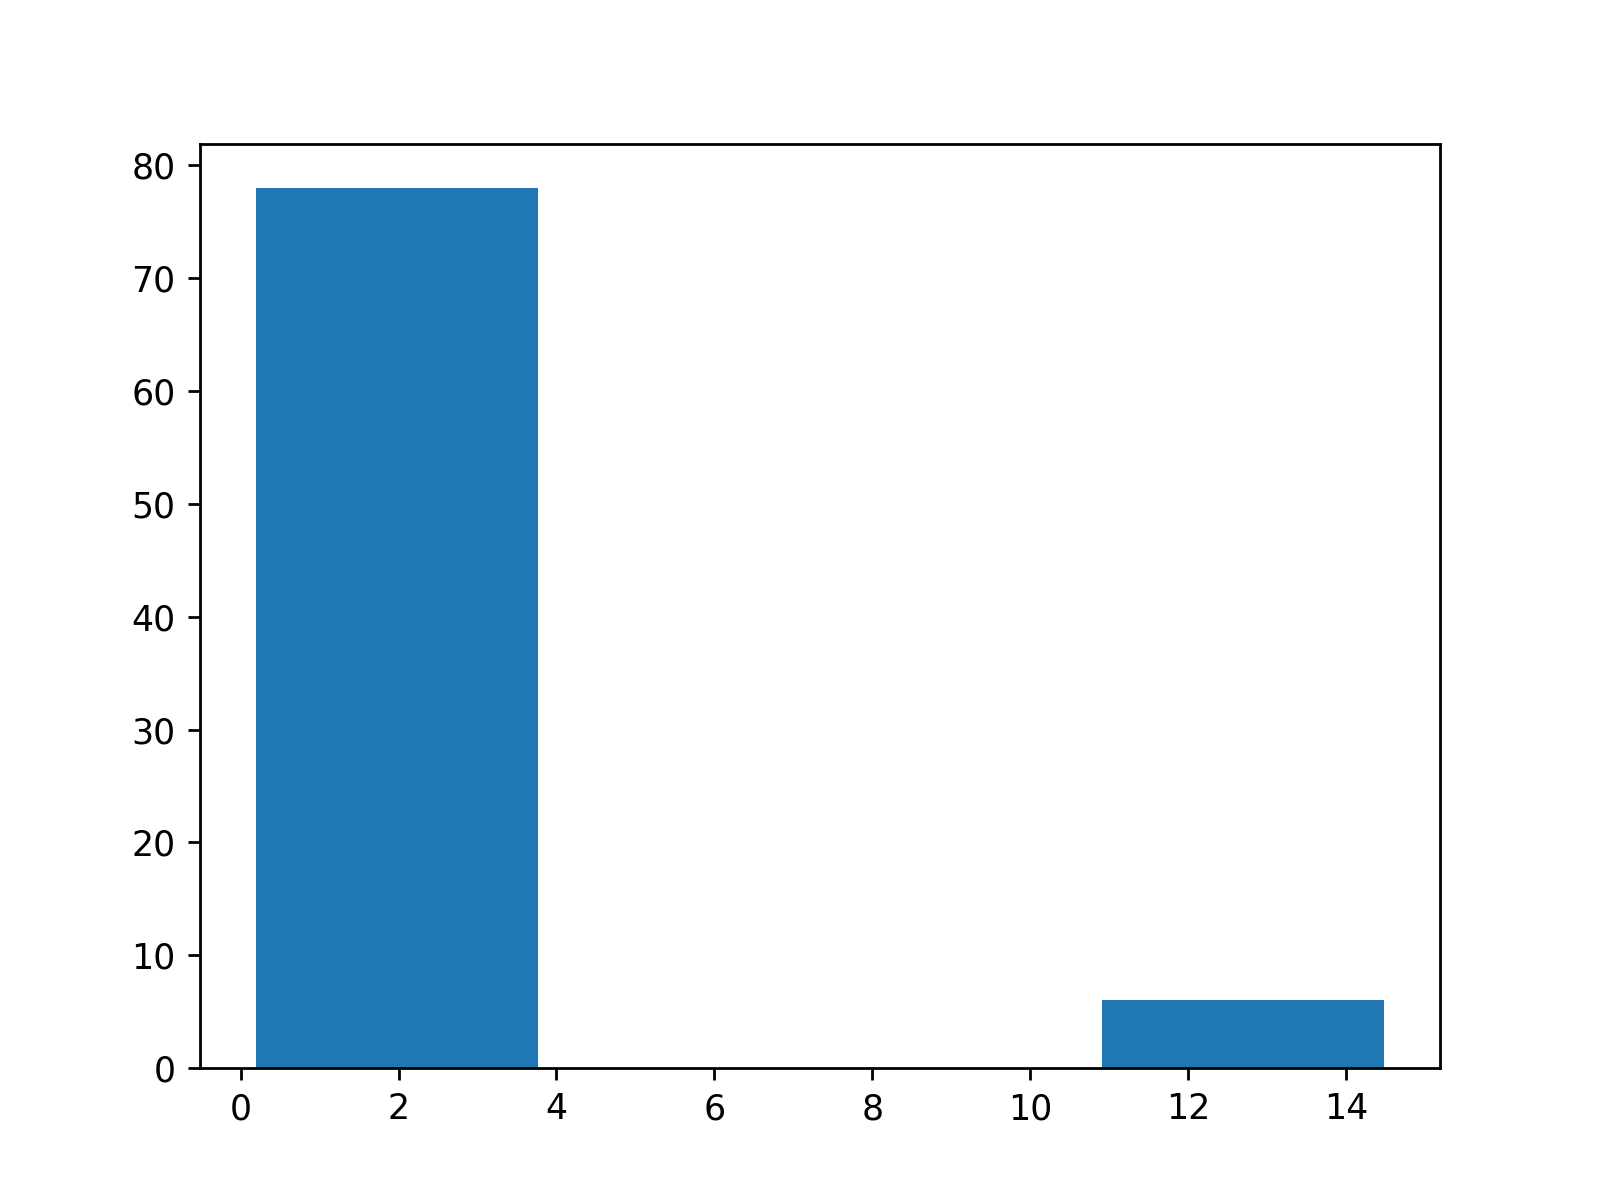

all saved!


<IPython.core.display.Javascript object>


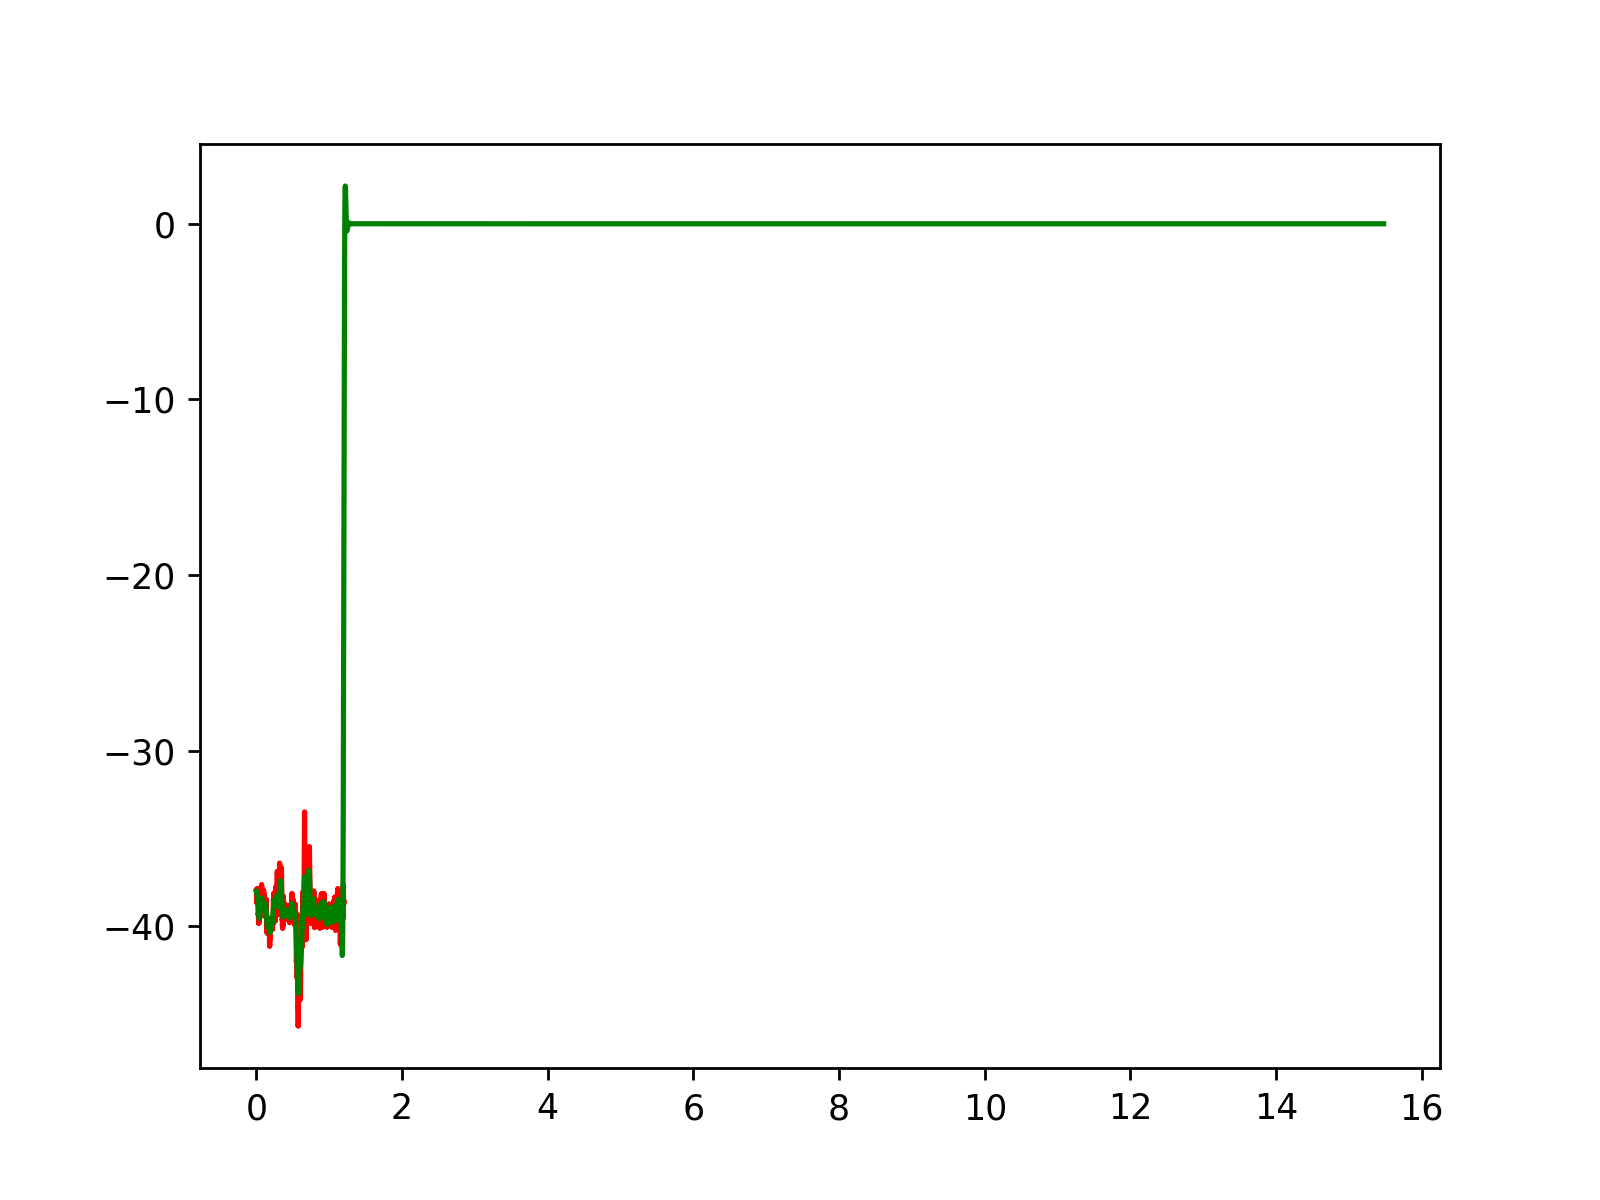

Vdf
    Angles   Locs          0          1          2          3          4  \
4    -12.5 -864.0 -40.644329 -40.657478 -40.657478 -40.664051 -40.670628   
17   -12.5 -864.0 -40.032845 -40.032845 -40.036133 -40.045994 -40.059147   
25   -12.5 -864.0 -39.161644 -39.171505 -39.168221 -39.171505 -39.161644   
24   -50.0 -216.0 -38.402222 -38.382496 -38.372635 -38.372635 -38.366058   
27   -50.0 -216.0 -40.151196 -40.151196 -40.151196 -40.128181 -40.131474   
40   -50.0 -216.0 -38.550163 -38.563313 -38.563313 -38.586327 -38.579750   
11  -100.0 -108.0 -38.237846 -38.241135 -38.244419 -38.260857 -38.257568   
18  -100.0 -108.0 -39.881618 -39.884907 -39.884907 -39.894768 -39.891479   
19  -100.0 -108.0 -40.292564 -40.295849 -40.292564 -40.295849 -40.292564   
5   -200.0  -54.0 -39.654778 -39.654778 -39.644913 -39.651489 -39.641628   
12  -200.0  -54.0 -38.043880 -38.030727 -38.020866 -38.011005 -37.994568   
35  -200.0  -54.0 -39.260273 -39.260273 -39.260273 -39.266846 -39.276711   
0   -300

In [2]:
#plt.close()
%matplotlib nbagg
thresh_pho = 13
Raw.epoch_idx,Raw.tepochs = Raw.checkepoch(thresh_pho)


N = 3 # order of filter
Wn = 0.001 # cut off frequency
plt.ioff()
bin_size = 0.05
Vdf,Apdf,T = Raw.save_eps(N, Wn,bin_size)
# chek if the filter works.
n = 20 # the epoch to check 
Raw.checkFilV(n, N, Wn,Apdf,Vdf,T)



In [3]:
# plot Rawtraces with filtV and bins
#plt.ioff()
plot = True
Raw.plotRAW(plot,bin_size,N,Wn,Apdf,Vdf,T)

In [4]:
Avg = AVG(fdname,recN)
blmode = 'None'#'None'#'indi'#None   
plot = True
Vavg = Avg.VMeanStd(blmode,plot)
if spiking:
    Apavg = Avg.ApMeanStd()

all saved!


In [5]:
recL = [recN]
Vset = MergeRecs(fdname,recL,0,'Vavg')
if spiking:
    Apset = MergeRecs(fdname,recL,0,'Apavg')
    Apset_norm = MergeRecs(fdname,recL,1,'Apavg')


all saved!


In [6]:
#recN = 17; fdname = 'H2/100818fly1'
#Apset, Apset_norm, Vset = loadset(fdname, recN)
if spiking: 
    pltTune(Vset, spiking, fdname, recN, Apset, Apset_norm)
else:
    pltTune(Vset, spiking, fdname, recN)

In [135]:
# to plot flowfield maps from the patches
RecP = [21,22,23,24]#[16,17,18,19]#[10,11,12,13] #[21,22,23,24]
MPtype = 2; Hz = 1
if spiking:
    VMov, ApMov, ApMov_norm, ApPre, ApPre_norm, Locsdf, xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy = calFMap(RecP, fdname,MPtype, spiking)
    for i,j in zip([VMov, ApMov, ApMov_norm],['Vmov','Apmov','Apmov_norm']): 
    #for i,j in zip([VMov, ApMov - ApPre, ApMov_norm-ApPre_norm],['Vmov','Apmov','Apmov_norm']):
        Vecdf = pltFMap(i,xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy)
        Vecdf.to_csv('Analysis/'+fdname+'/Vec_MT%d_'%MPtype+ str(Hz)+'Hz_'+str(RecP)+'%s.csv'%j)
        plt.title(str(RecP)+j)
        plt.savefig('Pics/'+fdname+'/'+str(RecP)+'%s.png'%j)
        #plt.close()
else:
    VMov, Locsdf, xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy = calFMap(RecP, fdname,MPtype, spiking)
    for i,j in zip([VMov],['Vmov']): 
        Vecdf = pltFMap(i,xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy)
        Vecdf.to_csv('Analysis/'+fdname+'/Vec_MT%d_'%MPtype+ str(Hz)+'Hz_'+str(RecP)+'%s.csv'%j)
        plt.title(str(RecP)+j)
        plt.savefig('Pics/'+fdname+'/'+str(RecP)+'%s.png'%j)
        #plt.close()



C:\Users\Huayi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
